# Начальные данные

In [46]:
import math
import copy
import numpy as np
from matplotlib import pyplot as plt

In [47]:
Xmin = 0
Xmax = 2
tmin = 0
cur = 0.25
h = 0.01
I = 201
tau = cur * h #так как лямбда = 1
tmax = 100*tau


## Основная часть

##### начальное условие

In [48]:
def fi(x):
    if x >= 0.4 and x <= 0.6:
        return math.sqrt(1-100*((x-0.5)**2))
    else:
        return 0

In [49]:
def ut_0(x):
    return 0

In [69]:
 #вектор из альф для точки E (третий порядок ааппроксимации) 0 0, 1 0,-1 -1, -1 1.

def calc_alpha(vec):
    vec[1] = - cur + vec[3]*(cur + 1) + vec[2]* (1 - cur)
    vec[0] = 1 - vec[1] - vec[2] - vec[3]
    return vec

vec_a =  calc_alpha([0, 0, 0, 1/5]) #ready
vec_b =  calc_alpha([0, 0, 0, 5/9]) #ready
vec_c =  calc_alpha([0, 0, 5/7, 0]) #ready
vec_d =  calc_alpha([0, 0, 1/3, 0]) #ready
vec_m = calc_alpha([0, 0, 130/411, -5/137])
vec_e = calc_alpha([0, 0, 2/3, -1/5])

vec_n = calc_alpha([0, 0, 5/21, 0])
vec_p = calc_alpha([0, 0, 2/3-6*math.sqrt(5/7), 2*math.sqrt(7/5)-1/5])

In [101]:
def calc_u(u, vec, m, n, m_max):
    u[m][n+1] = vec[0]*u[m][n] + vec[2]*u[m-1][n-1] + vec[3]*u[m-1][n+1]
    if (m + 1 < m_max): 
        u[m][n+1] = u[m][n+1] + vec[1]*u[m+1][n] 
    return u
def hyb_cnd(u, m, n, m_max):
    if (m - 1 < 0): 
        um1 = 0
    else:
        um1 = u[m - 1][n-1]
    return ((min(um1, u[m][n]) <= u[m][n + 1]) and (max(um1, u[m][n]) >= u[m][n + 1]))
def calc_all_u(vec):
    n_max = 50
    m_max = 201
    u = [[0] * n_max for i in range(m_max)]
    for m in range(0, m_max):
        u[m][0] = fi(m * h)
    for n in range(0, n_max - 1):
        for m in range(0, m_max):
            u = calc_u(u, vec, m, n, m_max)
    return u

def calc_all_hybr_u(vec1, vec2):
    sw1 = 0
    sw2 = 0
    n_max = 50
    m_max = 201
    u = [[0] * n_max for i in range(m_max)]
    for m in range(0, m_max):
        u[m][0] = fi(m * h)
    for n in range(0, n_max - 1):
        for m in range(0, m_max):
            u = calc_u(u, vec1, m, n, m_max)
            if (not(hyb_cnd(u, m, n, m_max))):
                u = calc_u(u, vec2, m, n, m_max)
                sw1 += 1
            else:
                sw2 += 1
    print('sw1: ', sw1 , ', sw2: ', sw2 , '\n')
    return u

def calc_all_hybr1_u(vec1, vec2, vec3):
    sw1 = 0
    sw2 = 0
    sw3 = 0
    n_max = 50
    m_max = 201
    u = [[0] * n_max for i in range(m_max)]
    for m in range(0, m_max):
        u[m][0] = fi(m * h)
    for n in range(0, n_max - 1):
        for m in range(0, m_max):
            u = calc_u(u, vec1, m, n, m_max)
            if ((hyb_cnd(u, m, n, m_max))):
                sw1 += 1
            else:
                u = calc_u(u, vec2, m, n, m_max)
                if ((hyb_cnd(u, m, n, m_max))):
                    sw2 += 1
                else:
                    u = calc_u(u, vec3, m, n, m_max)
                    sw3 += 1
    print('sw1: ', sw1 , ', sw2: ', sw2 , 'sw3: ',sw3,  '\n')
    return u

In [60]:
def print_u(u, n):
    print([round(u[i][n] , 2) for i in range(m_max)])
    pass

u = calc_all_u(vec_a)
print_u(u, 3)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.22, 0.44, 0.6, 0.72, 0.81, 0.87, 0.92, 0.96, 0.98, 0.99, 0.99, 0.99, 0.97, 0.94, 0.9, 0.84, 0.77, 0.68, 0.54, 0.25, 0.09, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

sw1:  9511 , sw2:  1 sw3:  337 



<function matplotlib.pyplot.show(*args, **kw)>

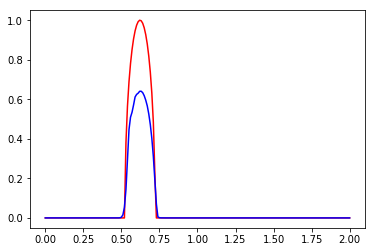

In [102]:
#u = calc_all_u(vec_e)
#u = calc_all_hybr_u(vec_p, vec_n)
u = calc_all_hybr1_u( vec_e, vec_p, vec_n )
n_max = 50
m_max = 201
xx = [i * h for i in range(m_max)]
u_true = [fi(i * h - (n_max - 1) * tau) for i in range(m_max)] #Точное
u_est = [u[i][n_max-1] for i in range(m_max)]  # Численное


plt.plot(xx, u_true, 'r')
plt.plot(xx, u_est, 'b')

plt.show